# Ensemble Learning and Random Forest

Ensemble Learning combines multiple models to improve predictive performance. Random Forest is an ensemble method that builds multiple decision trees and aggregates their predictions.
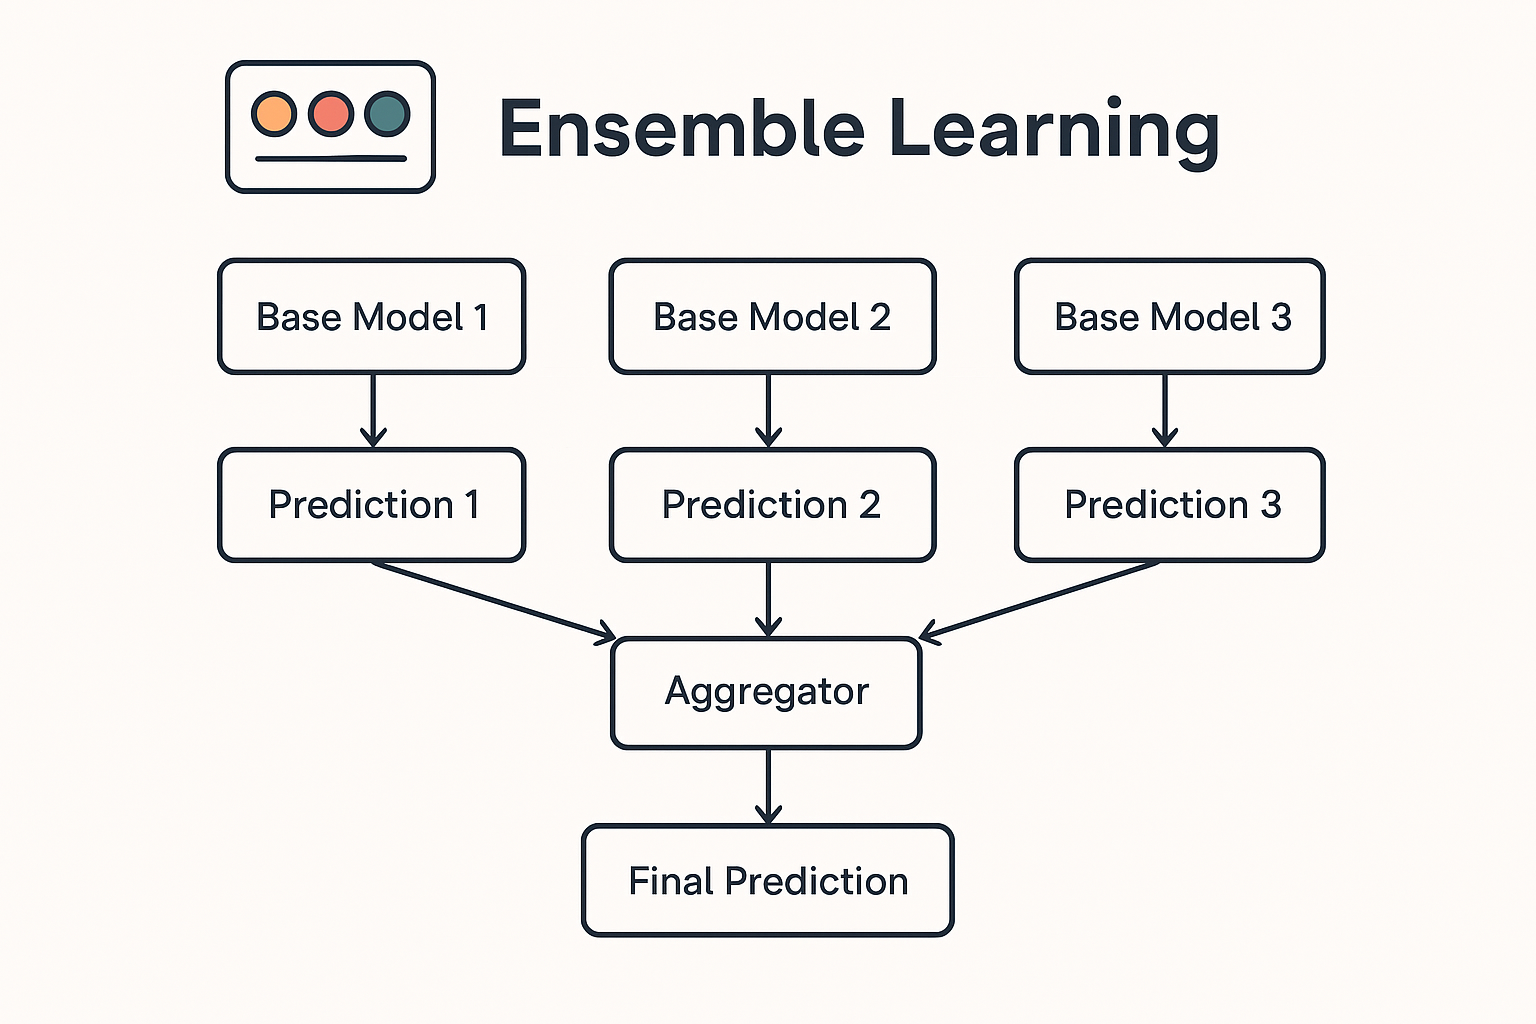
- Multiple Base Models (e.g., Decision Trees, SVMs) are trained independently.
- Each model makes its own prediction.
- An Aggregator combines these predictions (via voting, averaging, etc.).
- The result is a Final Prediction, which is generally more accurate and robust than any single model.

#### Ensemble learning methods are broadly categorized into three main types, each with its own approach to combining multiple models:

1. Bagging (Bootstrap Aggregating)

Concept: Train multiple models (usually decision trees) on different random subsets of the training data (with replacement).
Goal: Reduce variance and prevent overfitting.
Example Algorithms:

Random Forest (most popular bagging method)


How it works:

Each model votes, and the majority vote becomes the final prediction.




2. Boosting

Concept: Train models sequentially, where each new model focuses on correcting the errors of the previous ones.
Goal: Reduce bias and improve accuracy.
Example Algorithms:

AdaBoost
Gradient Boosting
XGBoost


How it works:

Assign weights to misclassified samples and adjust them iteratively.




3. Stacking

Concept: Combine predictions from multiple models using a meta-model (often a simple linear model or logistic regression).
Goal: Leverage strengths of different algorithms.
Example:

Base models: Decision Tree, SVM, Neural Network
Meta-model: Logistic Regression


How it works:

Predictions from base models become inputs for the meta-model.

### Random Forest

Random Forest creates multiple decision trees using bootstrapped samples and random subsets of features.

### Key Formulas:
- **Gini Index**: \( Gini = 1 - \sum_{i=1}^{n} p_i^2 \)
- **Entropy**: \( Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i) \)

Where \( p_i \) is the probability of class \( i \).


In [1]:
import pandas as pd

# Create dataset
data = {
    'HeightCm': [164.6, 159.9, 159.4, 150.1, 155.4, 155.9, 162.8, 158.9, 167.1, 143.8],
    'WeightKg': [33.3, 44.6, 45, 47.5, 48.2, 48.3, 48.5, 49.3, 49.4, 50.6],
    'Age': [36, 19, 55, 49, 37, 40, 46, 18, 49, 19],
    'ActivityLevelEncoded': [1, 1, 2, 1, 1, 1, 1, 2, 0, 1],
    'BodyType': ['Slim', 'Slim', 'Slim', 'Moderate', 'Moderate', 'Moderate', 'Slim', 'Moderate', 'Slim', 'Moderate']
}

df = pd.DataFrame(data)
print(df)


   HeightCm  WeightKg  Age  ActivityLevelEncoded  BodyType
0     164.6      33.3   36                     1      Slim
1     159.9      44.6   19                     1      Slim
2     159.4      45.0   55                     2      Slim
3     150.1      47.5   49                     1  Moderate
4     155.4      48.2   37                     1  Moderate
5     155.9      48.3   40                     1  Moderate
6     162.8      48.5   46                     1      Slim
7     158.9      49.3   18                     2  Moderate
8     167.1      49.4   49                     0      Slim
9     143.8      50.6   19                     1  Moderate


In [2]:
print(df.describe())
print(df['BodyType'].value_counts())


         HeightCm   WeightKg        Age  ActivityLevelEncoded
count   10.000000  10.000000  10.000000             10.000000
mean   157.790000  46.470000  36.800000              1.100000
std      6.916719   4.992005  13.790496              0.567646
min    143.800000  33.300000  18.000000              0.000000
25%    155.525000  45.625000  23.250000              1.000000
50%    159.150000  48.250000  38.500000              1.000000
75%    162.075000  49.100000  48.250000              1.000000
max    167.100000  50.600000  55.000000              2.000000
BodyType
Slim        5
Moderate    5
Name: count, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[['HeightCm', 'WeightKg', 'Age', 'ActivityLevelEncoded']]
y = df['BodyType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 1.0


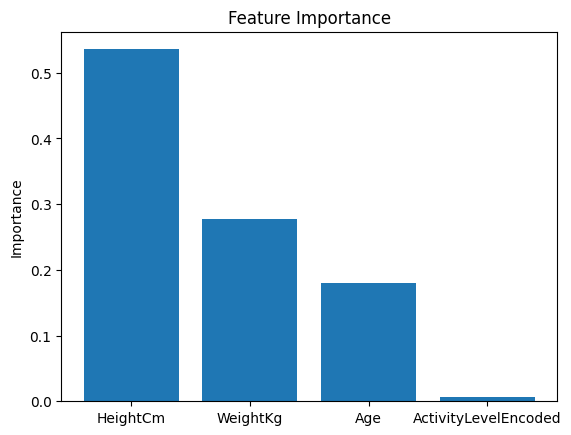

In [4]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.bar(features, importances)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()


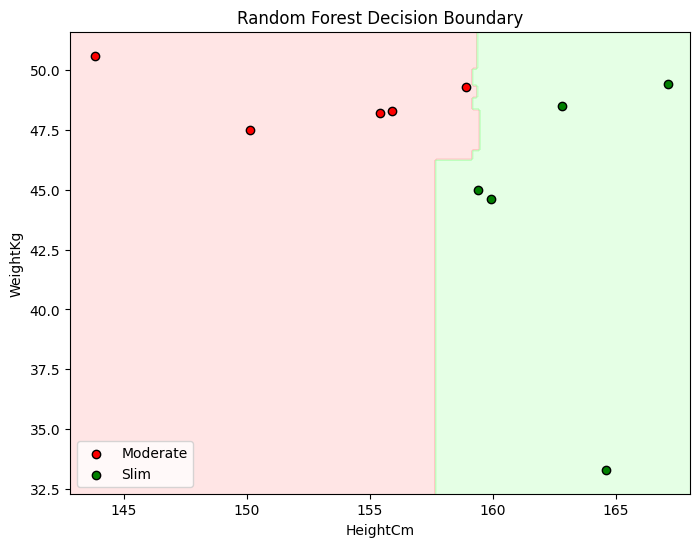

In [5]:
import numpy as np
from matplotlib.colors import ListedColormap

X_vis = X[['HeightCm', 'WeightKg']].values
y_vis = y.values

rf_vis = RandomForestClassifier(n_estimators=100, random_state=42)
rf_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = rf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([1 if val == 'Slim' else 0 for val in Z])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ['red', 'green']
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
for idx, label in enumerate(np.unique(y_vis)):
    plt.scatter(X_vis[y_vis == label, 0], X_vis[y_vis == label, 1], c=cmap_bold[idx], label=label, edgecolor='k')
plt.xlabel('HeightCm')
plt.ylabel('WeightKg')
plt.title('Random Forest Decision Boundary')
plt.legend()
plt.show()


In [8]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print('Bagging Accuracy:', accuracy_score(y_test, y_pred_bagging))
print('AdaBoost Accuracy:', accuracy_score(y_test, y_pred_adaboost))


C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest Accuracy: 1.0
Bagging Accuracy: 1.0
AdaBoost Accuracy: 1.0


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest: 0.7222222222222222


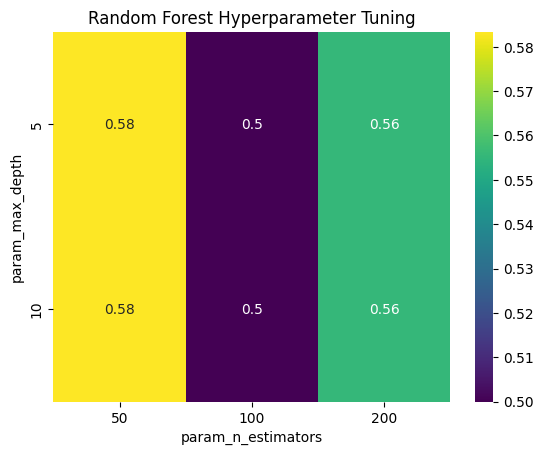

In [7]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', return_train_score=True)
grid_rf.fit(X_train, y_train)

print('Best Parameters for Random Forest:', grid_rf.best_params_)
print('Best Score for Random Forest:', grid_rf.best_score_)

# Heatmap visualization
results_rf = pd.DataFrame(grid_rf.cv_results_)
pivot_rf = results_rf.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_n_estimators')
sns.heatmap(pivot_rf, annot=True, cmap='viridis')
plt.title('Random Forest Hyperparameter Tuning')
plt.show()
